In [1]:
# disable Jedi for better autocomplete
%config Completer.use_jedi = False

# you can make it permanent by adding the following line to your Jupyter config file
# ~/.jupyter/jupyter_notebook_config.py
# c.Completer.use_jedi = False

In [2]:
#Importing tensorflow 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load the data

In [3]:
#Importing MNIST Dataset

mnist = tf.keras.datasets.mnist  # 28x28 images of handwritten digits from 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data() #seperating the training and testing data

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print ("Initial shape & Dimension of x_train:", str(x_train.shape))
print ("Number of samples in our training data:", str(len(x_train)))
print ("Number of lables in our training data:", str(len(x_test)))

Initial shape & Dimension of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of lables in our training data: 10000


In [6]:
print("Number of samples in test data:" + str(len(x_test)))
print("Number of labels in the test data:" + str(len(y_test)))

Number of samples in test data:10000
Number of labels in the test data:10000


In [7]:
#Checking images using openCV

import cv2
import numpy as np
for i in range(0,6):
 random_num = np.random.randint(0, len(x_train))
 img = x_train[random_num]
 window_name = 'Random Sample #' + str(i)
 cv2.imshow(window_name, img)
 cv2.waitKey()
cv2.destroyAllWindows()

# Note : A new window will open you can see the images and press tab for multiple times 

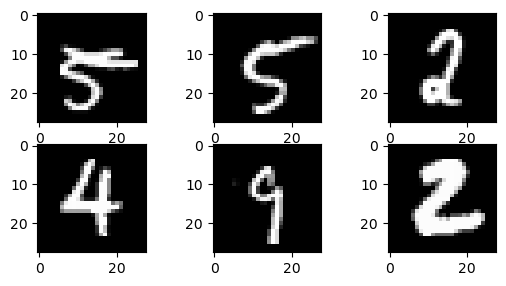

In [8]:
#Checking images using matplotlib
import matplotlib.pyplot as plt
plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(337)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(338)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(339)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

## Reshape the data

In [9]:
# the input required by Keras means to define it in the following format:
# the number of samples, rows, columns, depth

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# the MNIST dataset is in grayscale, we need reshape it into: #samples, #rows, #cols, depth.
# using numpy's reshape function, we can easily add a fourth dimension to our data.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the data

In [10]:
x_train /= 255 # normalize the data between 0 and 1; min max normalization formula: 𝑋ₙₒᵣₘ = (𝑋 − 𝑋ₘᵢₙ) / (𝑋ₘₐₓ − 𝑋ₘᵢₙ) where max is 255 and min is 0.
x_test /= 255 # normalize the data between 0 and 1
print('x_train shape:', x_train.shape)
print('x_test shape', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
60000 train samples
10000 test samples


## One-hot encoding the output

We are going to one-hot encode the output data. By using one-hot encoding, we can convert a categorical variable, and the variable with a new format helps to do a better machine learning prediction.
It is easier for the computer as  well to interpret the inputs in the form of one-hot encoding.
If we want to do the same for our data, we will get (0, 0, 0, 0, 0, 1, 0, 0, 0, 0) for 5

In [11]:
# the output is encoded as the numbers from 0 to 9
print(y_train.shape, y_train[0])
print(y_test.shape, y_test[0])

(60000,) 5
(10000,) 7


In [12]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train) # Converts labels to one-hot format
y_test = np_utils.to_categorical(y_test) # Converts labels to one-hot format; i.e. Converts a class vector (integers) to binary class matrix.

print ("Number of classes: " + str(y_test.shape[1]))
print(y_train.shape)
print(y_test.shape)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

display(y_train[0])
display(y_test[0])

Number of classes: 10
(60000, 10)
(10000, 10)


Using TensorFlow backend.


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Building and compiling the model

We are going to use conv2d and maxpooling2d, because we are developing a model for spatial data. There are also conv1d, conv3d, maxpooling1d, maxpooling3d at https://keras.io/layers/convolutional and https://keras.io/layers/pooling .

In [14]:
print(input_shape)

(28, 28, 1)


In [15]:
model = tf.keras.Sequential()

# add input layer
model.add(tf.keras.layers.Input(shape=input_shape))

# output shape: None - for #samples, 26 x 26 x 32
# Each filter has its own weights and bias.
# A single 3x3 filter operating on a 1-channel image has: 3×3x1 = 9 (weights) +1 (bias) = 10 learnable parameters per filter. 
# There are 32 such filters, so: 32 × 10 = 320 learnable parameters (because of a weight-sharing). 
# Each filter (kernel) has its own set of weights (3×3) and a bias (+1). This same filter (same weights) is slid across the entire input image. So no matter how many positions the filter is applied to, it always uses the same weights.
# Weight sharing is powerful because:
# - Fewer parameters → less overfitting
# - Efficient computation
# - The same filter detects the same pattern (like an edge) anywhere in the image
# If the input was a three-chanel image, then # learnable parameters: 3x3x3 = 27 weights per filter, 32 biases; 27 * 32 + 32 = 896
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')) # filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

# output shape: 24 x 24 x 64
# The previous layer had 32 filters → So, this layer has 32 input channels.
# Each filter in the new layer is 3×3, so:
# Weights per filter=3×3×32=288
# Total weights for 64 filters: 288 × 64 = 18432
# Each filter has 1 bias term. There are 64 filters, so: total biases = 64
# Total number of learable parameters is 18432 + 64 = 18496
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation ='relu'))

# output shape: 12 x 12 x 64, #learnable_parameters = 0
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2))) # integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). `(2, 2)` will halve the input in both spatial dimension.

# output shape: 12 x 12 x 64, #learnable_parameters = 0
model.add(tf.keras.layers.Dropout(0.25))

# output shape: 12 * 12 * 64 = 9216, #learnable_parameters = 0
model.add(tf.keras.layers.Flatten())

# output shape: (None, 128), #learnable_parameters = 9216 * 128 + 128 = 1179776 (128 biases in this layer)
model.add(tf.keras.layers.Dense(units = 128, activation='relu'))

# output shape: (None, 128), #learnable_parameters = 0
model.add(tf.keras.layers.Dropout(0.5))

# output shape: (None, 10), #learnable_parameters = 128 * 10 + 10 = 1290 (10 biases in this layer)
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [16]:
# Compiling the model 
# loss="categorical_crossentropy" is used when:
# - the labels are one-hot encoded (like [0,0,1,0,0,0,0,0,0,0] for class 2).
# - we are dealing with a multi-class classification problem (each image belongs to exactly one of 10 classes: 0-9).
# If the labels are not one-hot encoded and instead look like [0, 2, 7, 1, ...], we should use:
# loss="sparse_categorical_crossentropy"
model.compile(loss ="categorical_crossentropy", optimizer = "SGD", #keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), 
              metrics = ['accuracy'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Training the model

In [18]:
model.fit(x_train, y_train, epochs = 5) # `batch_size` is 32 by default

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.5653 - accuracy: 0.8229
Epoch 2/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2930 - accuracy: 0.9123
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2242 - accuracy: 0.9330
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1798 - accuracy: 0.9463
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1431 - accuracy: 0.9574


In [19]:
batch_size = 32
epochs = 6

history = model.fit(x_train,
                    y_train,
                    batch_size= batch_size,
                    epochs = epochs,
                    verbose = 1, 
                    #validation_split=0.2
                    validation_data = (x_test, y_test) # uses test data as a validation data. However, generally we use 20% of training data a validation data, so that test set is kept untouched/unseen.
                   )



score = model.evaluate(x_test, y_test, verbose = 0)
print('Test_loss:', score[0])
print('Test_accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1245 - accuracy: 0.9637 - val_loss: 0.0588 - val_accuracy: 0.9814
Epoch 2/6
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1091 - accuracy: 0.9677 - val_loss: 0.0560 - val_accuracy: 0.9814
Epoch 3/6
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0988 - accuracy: 0.9705 - val_loss: 0.0509 - val_accuracy: 0.9834
Epoch 4/6
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0885 - accuracy: 0.9740 - val_loss: 0.0464 - val_accuracy: 0.9848
Epoch 5/6
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0827 - accuracy: 0.9749 - val_loss: 0.0440 - val_accuracy: 0.9856
Epoch 6/6
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0446 - val_accuracy: 0.9852
Test_loss: 0.044626737588492685
Test_accuracy: 0.9852


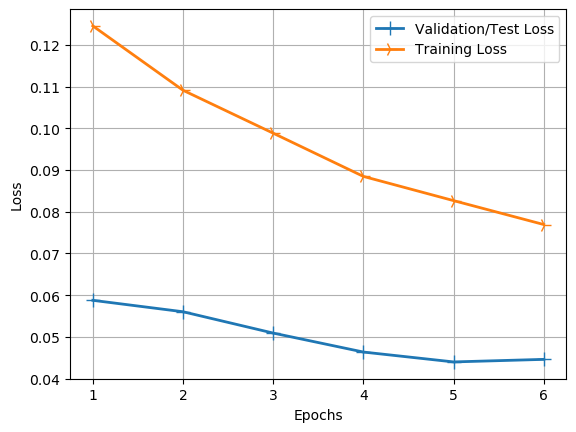

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

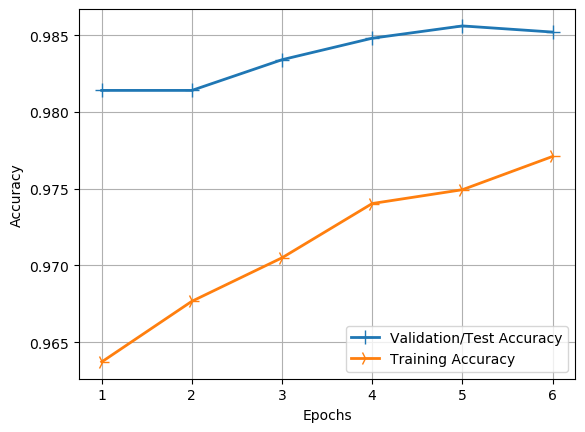

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Saving the model

In [22]:
model.save('mnist_model', save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_model\assets


In [23]:
from keras.models import load_model
new_model = tf.keras.models.load_model('mnist_model')

## Visualizing the model architecture

In [24]:
from tensorflow.keras.utils import plot_model
%matplotlib inline

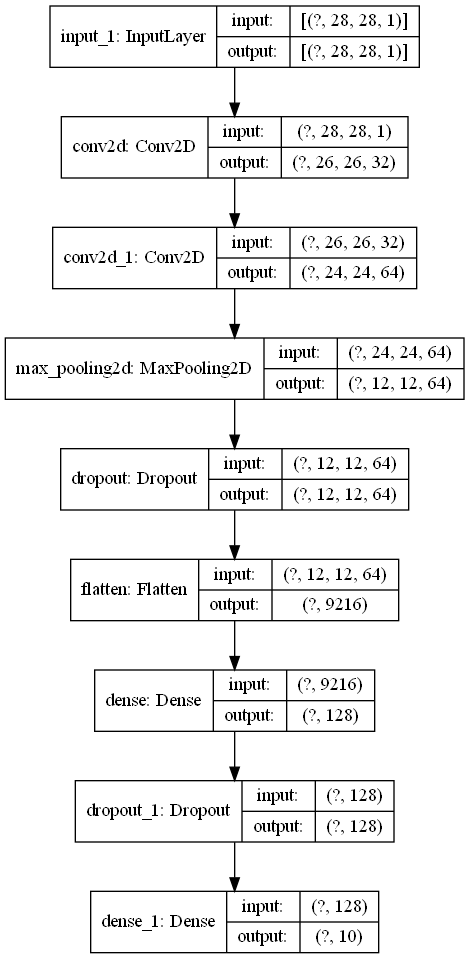

In [25]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

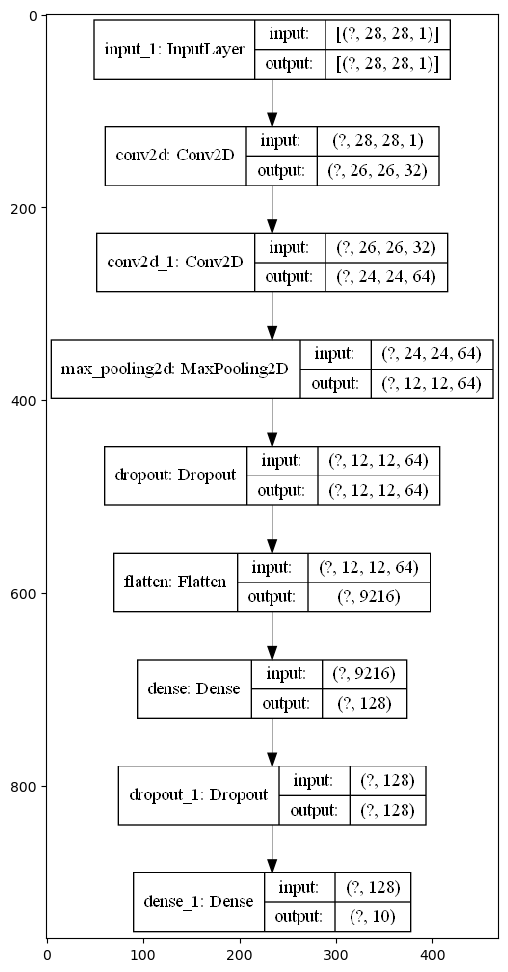

In [27]:
img = mpimg.imread("model.png")
plt.figure(figsize=(24, 12))  # Width=24 inches, Height=12 inches
plt.imshow(img)
plt.show()

## Confussion matrix 

In [28]:
import sklearn

In [29]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 974,    0,    0,    0,    0,    0,    2,    1,    3,    0],
       [   0, 1123,    4,    0,    0,    0,    2,    0,    6,    0],
       [   3,    1, 1024,    0,    0,    0,    0,    2,    2,    0],
       [   0,    0,    2,  999,    0,    4,    0,    3,    2,    0],
       [   1,    0,    2,    0,  961,    0,    4,    0,    2,   12],
       [   2,    0,    0,    4,    0,  884,    1,    1,    0,    0],
       [   8,    2,    0,    0,    2,    4,  940,    0,    2,    0],
       [   1,    2,    9,    2,    0,    0,    0, 1011,    2,    1],
       [   6,    0,    1,    1,    1,    1,    1,    3,  957,    3],
       [   4,    3,    0,    7,    3,    1,    0,    8,    4,  979]],
      dtype=int64)

## More advanced confusion matrix

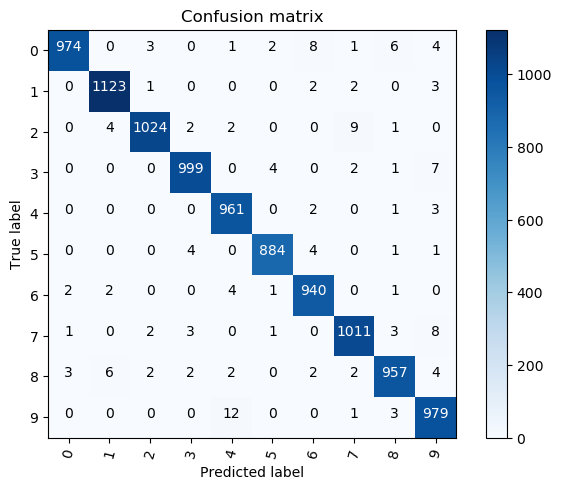

In [30]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(10)
cm = confusion_matrix(y_pred,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [31]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

